In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df = pd.read_table('/Users/charlottewang/Desktop/code/data.csv', sep=',')

In [4]:
df.head()

,VS0073,SCS235,VS0074,SCS236,SCS238,VS0075,VS0076,SCS239,VS0077,SCS240,...,VS0036,VS0037,VS0041,VS0043,VS0044,VS0050,VS0051,VS0053,SCS230,SCS231
0,NaN,(02) No,NaN,(02) No,(02) No,NaN,NaN,(02) No,NaN,(02) No,...,(01) Yes,(01) Yes,(03) Don't know,(03) Don't know,(01) Yes,(02) Agree,(02) Agree,(01) Strongly Agree,(02) No,(99) Don't know
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,(02) No,NaN,(02) No,(02) No,NaN,NaN,(02) No,NaN,(02) No,...,(01) Yes,(01) Yes,(01) Yes,(01) Yes,(01) Yes,(01) Strongly Agree,(01) Strongly Agree,(01) Strongly Agree,(02) No,(02) No
3,(02) No,NaN,(02) No,NaN,NaN,(02) No,(02) No,NaN,(02) No,NaN,...,(01) Yes,(01) Yes,(02) No,(01) Yes,(01) Yes,(01) Strongly Agree,(01) Strongly Agree,(01) Strongly Agree,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(14273, 102)

In [6]:
df.dropna(axis = 0, how = 'all', inplace=True)
df.shape

(14273, 102)

<Axes: >

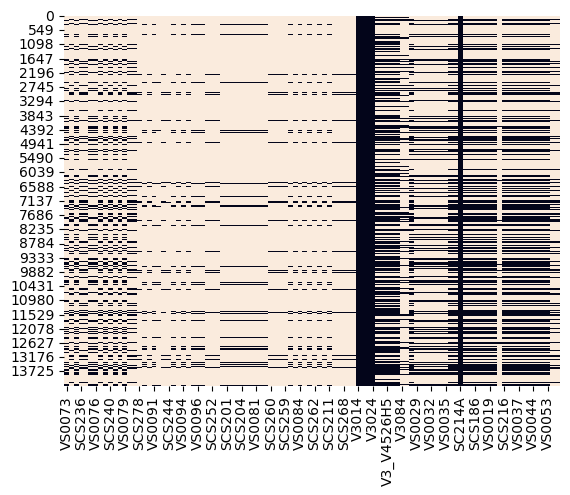

In [7]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [8]:
df.rename(columns = {'V3017':'gender'}, inplace = True)
df['gender'].value_counts()

(1) Male       7408
(2) Female     6859
(8) Residue       4
Name: gender, dtype: int64

### remove  rows with residue value for gender 
### 0 = female , 1 = male

In [9]:
def gender(r):
    if r['gender'] == "(1) Male":
        return 1
    elif r['gender'] == '(2) Female':
        return 0
    else:
        return None
df['gender'] = df.apply(gender, axis=1)

In [10]:
# df.drop(df.loc[df['gender']=='(8) Residue'].index, inplace=True)
# df.drop(df.loc[df['gender']== 'nan'].index, inplace=True)

# df.loc[df["gender"] == "(1) Male", "gender"] = 1
# df.loc[df['gender']== '(2) Female', 'gender'] = 0
df['gender'].value_counts()
female = len(df[df['gender'] == 0])
male = len(df[df['gender'] == 1])
female
male

1.0    7408
0.0    6859
Name: gender, dtype: int64

6859

7408

In [11]:
df['gender'].unique()

array([ 1.,  0., nan])

# 1) Different ways of bullying (9)

## 1.1 MADE FUN OF YOU, CALLED YOU NAMES, OR INSULTED YOU, IN A HURFUL WAY? (BEING BULLIED) 

In [12]:
df['VS0073'].value_counts()
df['VS0073'].unique()

(02) No            3139
(01) Yes            508
(08) Residue         18
(98) Refused         14
(99) Don't know       5
Name: VS0073, dtype: int64

array([nan, '(02) No ', '(01) Yes ', '(08) Residue ', '(98) Refused ',
       "(99) Don't know"], dtype=object)

In [13]:
df['SCS235'].value_counts()
df['SCS235'].unique()

(02) No            2019
(01) Yes            348
(08) Residue         16
(98) Refused         10
(99) Don't know       8
Name: SCS235, dtype: int64

array(['(02) No', nan, "(99) Don't know", '(01) Yes', '(98) Refused',
       '(08) Residue'], dtype=object)

In [14]:
def insulted(row):
    if row['VS0073'] == '(01) Yes ' or row['SCS235'] == '(01) Yes' :
        return 1
    elif row['VS0073'] == '(02) No ' or row['SCS235'] =='(02) No':
        return 0
    elif row['VS0073'] == '(08) Residue ' or row['SCS235'] =='(08) Residue':
        return 'residue'
    elif row['VS0073'] == '(98) Refused ' or row['SCS235'] =='(98) Refused':
        return 'refused'
    elif row['VS0073'] == '(99) Don\'t know' or row['SCS235'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['insulted'] = df.apply(insulted, axis=1)
df.drop('VS0073', axis = 1, inplace = True)
df.drop('SCS235', axis = 1, inplace = True)
df['insulted'].value_counts()

NaN           8188
0             5158
1              856
residue         34
refused         24
don't know      13
Name: insulted, dtype: int64

In [15]:
print('male being insulted=', len(df[(df['gender']==1) & (df['insulted']==1)])/len(df[(df['gender']==1)]))
print('female being insulted=', len(df[(df['gender']==0) & (df['insulted']==1)])/len(df[(df['gender']==0)]))

male being insulted= 0.056020518358531314
female being insulted= 0.06429508674733926


## 1.2 SPREAD RUMORS

In [16]:
df['VS0074'].unique()
df['VS0074'].value_counts()
df['SCS236'].unique()
df['SCS236'].value_counts()

array([nan, '(02) No ', '(01) Yes ', '(08) Residue ', '(98) Refused ',
       "(99) Don't know"], dtype=object)

(02) No            3098
(01) Yes            542
(08) Residue         18
(98) Refused         14
(99) Don't know      12
Name: VS0074, dtype: int64

array(['(02) No', nan, "(99) Don't know", '(01) Yes', '(98) Refused',
       '(08) Residue'], dtype=object)

(02) No            2031
(01) Yes            335
(08) Residue         16
(98) Refused         10
(99) Don't know       9
Name: SCS236, dtype: int64

In [17]:
def rumors(row):
    if row['VS0074'] == '(01) Yes ' or row['SCS236'] == '(01) Yes' :
        return 1
    elif row['VS0074'] == '(02) No ' or row['SCS236'] =='(02) No':
        return 0
    elif row['VS0074'] == '(08) Residue ' or row['SCS236'] =='(08) Residue':
        return 'residue'
    elif row['VS0074'] == '(98) Refused ' or row['SCS236'] =='(98) Refused':
        return 'refused'
    elif row['VS0074'] == '(99) Don\'t know' or row['SCS236'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['rumors'] = df.apply(rumors, axis=1)
df.drop('VS0074', axis = 1, inplace = True)
df.drop('SCS236', axis = 1, inplace = True)
df['rumors'].value_counts()

NaN           8188
0             5129
1              877
residue         34
refused         24
don't know      21
Name: rumors, dtype: int64

In [18]:
print('male rumors=', len(df[(df['gender']==1) & (df['rumors']==1)])/len(df[(df['gender']==1)]))
print('female rumors=', len(df[(df['gender']==0) & (df['rumors']==1)])/len(df[(df['gender']==0)]))

male rumors= 0.04859611231101512
female rumors= 0.07537541915731157


## 1.3 threaten with harm

In [19]:
df['VS0075'].unique()
df['VS0075'].value_counts()
df['SCS238'].unique()
df['SCS238'].value_counts()

array([nan, '(02) No ', '(01) Yes ', '(08) Residue ', '(98) Refused ',
       "(99) Don't know"], dtype=object)

(02) No            3463
(01) Yes            184
(08) Residue         18
(98) Refused         14
(99) Don't know       5
Name: VS0075, dtype: int64

array(['(02) No', nan, "(99) Don't know", '(01) Yes', '(98) Refused',
       '(08) Residue'], dtype=object)

(02) No            2288
(01) Yes             82
(08) Residue         16
(98) Refused         10
(99) Don't know       5
Name: SCS238, dtype: int64

In [20]:
def threaten(row):
    if row['VS0075'] == '(01) Yes ' or row['SCS238'] == '(01) Yes' :
        return 1
    elif row['VS0075'] == '(02) No ' or row['SCS238'] =='(02) No':
        return 0
    elif row['VS0075'] == '(08) Residue ' or row['SCS238'] =='(08) Residue':
        return 'residue'
    elif row['VS0075'] == '(98) Refused ' or row['SCS238'] =='(98) Refused':
        return 'refused'
    elif row['VS0075'] == '(99) Don\'t know' or row['SCS238'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['threaten'] = df.apply(threaten, axis=1)
df.drop('VS0075', axis = 1, inplace = True)
df.drop('SCS238', axis = 1, inplace = True)
df['threaten'].value_counts()

NaN           8188
0             5751
1              266
residue         34
refused         24
don't know      10
Name: threaten, dtype: int64

In [21]:
# print('male threaten with harm=', len(df[(df['gender']==1) & (df['threaten']==1)])/len(df[(df['gender']==1)]))
print('female threaten with harm=', len(df[(df['gender']==0) & (df['threaten']==1)])/len(df[(df['gender']==0)]))

female threaten with harm= 0.01662049861495845


## 1.4 PUSHED YOU, SHOVED YOU, TRIPPED YOU, OR SPIT ON YOU 


In [22]:
def spit(row):
    if row['VS0076'] == '(01) Yes ' or row['SCS239'] == '(01) Yes' :
        return 1
    elif row['VS0076'] == '(02) No ' or row['SCS239'] =='(02) No':
        return 0
    elif row['VS0076'] == '(08) Residue ' or row['SCS239'] =='(08) Residue':
        return 'residue'
    elif row['VS0076'] == '(98) Refused ' or row['SCS239'] =='(98) Refused':
        return 'refused'
    elif row['VS0076'] == '(99) Don\'t know' or row['SCS239'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['spit'] = df.apply(spit, axis=1)
df.drop('VS0076', axis = 1, inplace = True)
df.drop('SCS239', axis = 1, inplace = True)
df['spit'].value_counts()

print('male spit=', len(df[(df['gender']==1) & (df['spit']==1)])/len(df[(df['gender']==1)]))
print('female spit=', len(df[(df['gender']==0) & (df['spit']==1)])/len(df[(df['gender']==0)]))

NaN           8193
0             5657
1              360
residue         34
refused         25
don't know       4
Name: spit, dtype: int64

male spit= 0.031047516198704102
female spit= 0.01895320017495262


## 1.5 TRIED TO MAKE YOU DO THINGS YOU DID NOT WANT TO DO 

In [23]:
def force(row):
    if row['VS0077'] == '(01) Yes ' or row['SCS240'] == '(01) Yes' :
        return 1
    elif row['VS0077'] == '(02) No ' or row['SCS240'] =='(02) No':
        return 0
    elif row['VS0077'] == '(08) Residue ' or row['SCS240'] =='(08) Residue':
        return 'residue'
    elif row['VS0077'] == '(98) Refused ' or row['SCS240'] =='(98) Refused':
        return 'refused'
    elif row['VS0077'] == '(99) Don\'t know' or row['SCS240'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['force'] = df.apply(force, axis=1)
df.drop('VS0077', axis = 1, inplace = True)
df.drop('SCS240', axis = 1, inplace = True)
df['force'].value_counts()

print('male force=', len(df[(df['gender']==1) & (df['force']==1)])/len(df[(df['gender']==1)]))
print('female force=', len(df[(df['gender']==0) & (df['force']==1)])/len(df[(df['gender']==0)]))

NaN           8188
0             5869
1              145
residue         34
refused         25
don't know      12
Name: force, dtype: int64

male force= 0.011204103671706264
female force= 0.009039218544977402


## 1.6 EXCLUDED YOU FROM ACTIVITIES, SOCIAL MEDIA, OR OTHER COMMUNICATIONS ON PURPOSE 


In [24]:
def exclude(row):
    if row['VS0078'] == '(01) Yes ' or row['SCS241'] == '(01) Yes' :
        return 1
    elif row['VS0078'] == '(02) No ' or row['SCS241'] =='(02) No':
        return 0
    elif row['VS0078'] == '(08) Residue ' or row['SCS241'] =='(08) Residue':
        return 'residue'
    elif row['VS0078'] == '(98) Refused ' or row['SCS241'] =='(98) Refused':
        return 'refused'
    elif row['VS0078'] == '(99) Don\'t know' or row['SCS241'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['exclude'] = df.apply(exclude, axis=1)
df.drop('VS0078', axis = 1, inplace = True)
df.drop('SCS241', axis = 1, inplace = True)
df['exclude'].value_counts()

print('male exclude=', len(df[(df['gender']==1) & (df['exclude']==1)])/len(df[(df['gender']==1)]))
print('female exclude=', len(df[(df['gender']==0) & (df['exclude']==1)])/len(df[(df['gender']==0)]))

NaN           8188
0             5686
1              327
residue         34
refused         25
don't know      13
Name: exclude, dtype: int64

male exclude= 0.016468682505399568
female exclude= 0.02988773873742528


## 1.7 DESTROYED YOUR PROPERTY ON PURPOSE


In [25]:
def destroy_property(row):
    if row['VS0079'] == '(01) Yes ' or row['SCS242'] == '(01) Yes' :
        return 1
    elif row['VS0079'] == '(02) No ' or row['SCS242'] =='(02) No':
        return 0
    elif row['VS0079'] == '(08) Residue ' or row['SCS242'] =='(08) Residue':
        return 'residue'
    elif row['VS0079'] == '(98) Refused ' or row['SCS242'] =='(98) Refused':
        return 'refused'
    elif row['VS0079'] == '(99) Don\'t know' or row['SCS242'] =='(99) Don\'t know':
        return 'don\'t know'
    else:
        return 'NaN'
df['destroy_property'] = df.apply(destroy_property, axis=1)
df.drop('VS0079', axis = 1, inplace = True)
df.drop('SCS242', axis = 1, inplace = True)
df['destroy_property'].value_counts()

print('male destroy_property=', len(df[(df['gender']==1) & (df['destroy_property']==1)])/len(df[(df['gender']==1)]))
print('female destroy_property=', len(df[(df['gender']==0) & (df['destroy_property']==1)])/len(df[(df['gender']==0)]))

NaN           8188
0             5913
1              105
residue         34
refused         25
don't know       8
Name: destroy_property, dtype: int64

male destroy_property= 0.007694384449244061
female destroy_property= 0.006998104679982505


## 1.8 DURING THIS SCHOOL YEAR, HAS ANOTHER STUDENT IN PERSON OR USING TECHNOLOGIES: PURPOSELY SHARED YOUR PRIVATE INFORMATION, PHOTOS, OR VIDEOS IN A HURTFUL WAY? 

In [26]:
df.rename(columns = {'SCS237':'shared_info'}, inplace = True)
df['shared_info'].value_counts()

(02) No             2319
(01) Yes              50
(08) Residue          16
(98) Refused          10
(99) Don't know        6
Name: shared_info, dtype: int64

In [27]:
print('male shared_info=', len(df[(df['gender']==1) & (df['shared_info']=='(01) Yes')])/len(df[(df['gender']==1)]))
print('female shared_info=', len(df[(df['gender']==0) & (df['shared_info']=='(01) Yes')])/len(df[(df['gender']==0)]))

male shared_info= 0.002294816414686825
female shared_info= 0.004811196967487972


# 1.9 Being Bullied COMBO

In [28]:
df['SCS278'].unique()

array([nan, '(02) No', '(01) Yes', "(03) Don't know", '(08) Residue',
       '(98) Refused'], dtype=object)

In [29]:
def bullied(row):
    if row['SCS278'] == '(01) Yes' or row['insulted'] == 1  or row['rumors'] == 1 or row['threaten'] == 1 or row['spit'] == 1 or row['force'] == 1 or row['exclude']== 1 or row['destroy_property'] == 1 or row['shared_info'] == 1:
            return 1
    elif row['SCS278'] is None and row['insulted'] ==  'NaN'and row['rumors'] == 'NaN' and row['threaten'] == 'NaN'and row['spit'] == 'NaN'and row['force'] == 'NaN'and row['exclude']== 'NaN'and row['destroy_property'] == 'NaN'and row['shared_info'] == 'NaN':
            return 'NaN'
    else:
        return 0 
df['bullied'] = df.apply(bullied, axis = 1)
df['bullied'].value_counts()
total_bullied = len(df[df['bullied']==1])
total_bullied

0    12934
1     1339
Name: bullied, dtype: int64

1339

In [30]:
female_bullied = len(df[(df['gender']==0) & (df['bullied']==1)])
male_bullied = len(df[(df['gender']==1) & (df['bullied']==1)])
print(female_bullied/female, 'of female were bullied')
print(male_bullied/male, 'of male were bullied')
print(female_bullied/total_bullied, 'of bullied victims were female')
print(male_bullied/total_bullied, 'of bullied victims were male')

0.10176410555474559 of female were bullied
0.0865280777537797 of male were bullied
0.5212845407020165 of bullied victims were female
0.4787154592979836 of bullied victims were male


In [31]:
print('male being insulted=', len(df[(df['gender']==1) & (df['insulted']==1)])/male_bullied)
print('female being insulted=', len(df[(df['gender']==0) & (df['insulted']==1)])/female_bullied)
print('male rumors=', len(df[(df['gender']==1) & (df['rumors']==1)])/male_bullied)
print('female rumors=', len(df[(df['gender']==0) & (df['rumors']==1)])/female_bullied)
print('male threaten with harm=', len(df[(df['gender']==1) & (df['threaten']==1)])/male_bullied)
print('female threaten with harm=', len(df[(df['gender']==0) & (df['threaten']==1)])/female_bullied)
print('male spit=', len(df[(df['gender']==1) & (df['spit']==1)])/male_bullied)
print('female spit=', len(df[(df['gender']==0) & (df['spit']==1)])/female_bullied)
print('male force=', len(df[(df['gender']==1) & (df['force']==1)])/male_bullied)
print('female force=', len(df[(df['gender']==0) & (df['force']==1)])/female_bullied)
print('male exclude=', len(df[(df['gender']==1) & (df['exclude']==1)])/male_bullied)
print('female exclude=', len(df[(df['gender']==0) & (df['exclude']==1)])/female_bullied)
print('male destroy_property=', len(df[(df['gender']==1) & (df['destroy_property']==1)])/male_bullied)
print('female destroy_property=', len(df[(df['gender']==0) & (df['destroy_property']==1)])/female_bullied)
print('male shared_info=', len(df[(df['gender']==1) & (df['shared_info']=='(01) Yes')])/male_bullied)
print('female shared_info=', len(df[(df['gender']==0) & (df['shared_info']=='(01) Yes')])/female_bullied)

male being insulted= 0.6474258970358814
female being insulted= 0.6318051575931232
male rumors= 0.5616224648985959
female rumors= 0.7406876790830945
male threaten with harm= 0.23712948517940718
female threaten with harm= 0.16332378223495703
male spit= 0.358814352574103
female spit= 0.18624641833810887
male force= 0.1294851794071763
female force= 0.08882521489971347
male exclude= 0.19032761310452417
female exclude= 0.29369627507163326
male destroy_property= 0.08892355694227769
female destroy_property= 0.06876790830945559
male shared_info= 0.0265210608424337
female shared_info= 0.04727793696275072


# 2) Bullying in different locations (9)

## 2.1 inside classrooms 

In [32]:
df['VS0081'].unique()
df['VS0081'].value_counts()

df['SCS257'].unique()
df['SCS257'].value_counts()

array([nan, '(0) Not selected ', '(1) In a classroom at school',
       '(8) Residue  '], dtype=object)

(0) Not selected                426
(1) In a classroom at school    371
(8) Residue                      19
Name: VS0081, dtype: int64

array([nan, '(1) Response selected', '(0) Response not selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    319
(1) Response selected        209
(8) Residue                   16
Name: SCS257, dtype: int64

In [33]:
def classroom(row):
    if row['VS0081'] == '(1) In a classroom at school' or row['SCS257'] == '(1) Response selected' :
        return 1
    elif  row['VS0081'] == '(8) Residue  ' and row['SCS257'] == '(8) Residue':
        return None
    else:
        return 0
df['classroom'] = df.apply(classroom, axis=1)
df.drop('VS0081', axis = 1, inplace = True)
df.drop('SCS257', axis = 1, inplace = True)
df['classroom'].value_counts()

print('male classroom=', len(df[(df['gender']==1) & (df['classroom']==1)])/male_bullied)
print('female classrom=', len(df[(df['gender']==0) & (df['classroom']==1)])/female_bullied)

0    13693
1      580
Name: classroom, dtype: int64

male classroom= 0.42589703588143524
female classrom= 0.43982808022922637


## 2.2 Somewhere else in schoolbuilding

In [34]:
df['VS0082'].unique()
df['VS0082'].value_counts()

df['SCS258'].unique()
df['SCS258'].value_counts()

array([nan, '(0) Not selected ',
       '(1) In a hallway or stairwell at school', '(8) Residue '],
      dtype=object)

(0) Not selected                           478
(1) In a hallway or stairwell at school    319
(8) Residue                                 19
Name: VS0082, dtype: int64

array([nan, '(0) Response not selected', '(1) Response selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    313
(1) Response selected        215
(8) Residue                   16
Name: SCS258, dtype: int64

In [35]:
def hallway(row):
    if row['VS0082'] == '(1) In a hallway or stairwell at school' or row['SCS258'] == '(1) Response selected' :
        return 1
    elif  row['VS0082'] == '(8) Residue  ' and row['SCS258'] == '(8) Residue':
        return None
    else:
        return 0
df['hallway'] = df.apply(hallway, axis=1)
df.drop('VS0082', axis = 1, inplace = True)
df.drop('SCS258', axis = 1, inplace = True)
df['hallway'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['hallway']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['hallway']==1)])/female_bullied)

0    13739
1      534
Name: hallway, dtype: int64

male= 0.37753510140405616
female= 0.4183381088825215


## 2.3  BATHROOM OR LOCKER ROOM 


In [36]:
df['VS0083'].unique()
df['VS0083'].value_counts()

df['SCS259'].unique()
df['SCS259'].value_counts()

array([nan, '(0) Not selected ',
       '(1) In a bathroom or locker room at school', '(8) Residue '],
      dtype=object)

(0) Not selected                              697
(1) In a bathroom or locker room at school    100
(8) Residue                                    19
Name: VS0083, dtype: int64

array([nan, '(0) Response not selected', '(8) Residue',
       '(1) Response selected'], dtype=object)

(0) Response not selected    486
(1) Response selected         42
(8) Residue                   16
Name: SCS259, dtype: int64

In [37]:
def bathroom(row):
    if row['VS0083'] == '(1) In a bathroom or locker room at school' or row['SCS259'] == '(1) Response selected' :
        return 1
    else:
        return 0
df['bathroom'] = df.apply(bathroom, axis=1)
df.drop('VS0083', axis = 1, inplace = True)
df.drop('SCS259', axis = 1, inplace = True)
df['bathroom'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['bathroom']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['bathroom']==1)])/female_bullied)

0    14131
1      142
Name: bathroom, dtype: int64

male= 0.12168486739469579
female= 0.09169054441260745


## 2.4 GYMNASIUM OR WEIGHT ROOM 

In [38]:
df['SCS260'].unique()
df['SCS260'].value_counts()

array([nan, '(1) Response selected', '(0) Response not selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    465
(1) Response selected         63
(8) Residue                   16
Name: SCS260, dtype: int64

In [39]:
df.rename(columns = {'SCS260':'gym'}, inplace = True)
print('male=', len(df[(df['gender']==1) & (df['gym']=='(1) Response selected')])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['gym']=='(1) Response selected')])/female_bullied)

male= 0.0686427457098284
female= 0.027220630372492838


## 2.5 CAFETERIA OR LUNCHROOM 


In [40]:
df['VS0087'].unique()
df['VS0087'].value_counts()

df['SCS261'].unique()
df['SCS261'].value_counts()

array([nan, '(1) In a cafeteria or lunchroom at school',
       '(0) Not selected ', '(8) Residue '], dtype=object)

(0) Not selected                             575
(1) In a cafeteria or lunchroom at school    222
(8) Residue                                   19
Name: VS0087, dtype: int64

array([nan, '(1) Response selected', '(0) Response not selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    392
(1) Response selected        136
(8) Residue                   16
Name: SCS261, dtype: int64

In [41]:
def cafe(row):
    if row['VS0087'] == '(1) In a cafeteria or lunchroom at school' or row['SCS261'] == '(1) Response selected' :
        return 1
    else:
        return 0
df['cafe'] = df.apply(cafe, axis=1)
df.drop('VS0087', axis = 1, inplace = True)
df.drop('SCS261', axis = 1, inplace = True)
df['cafe'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['cafe']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['cafe']==1)])/female_bullied)

0    13915
1      358
Name: cafe, dtype: int64

male= 0.2745709828393136
female= 0.2607449856733524


## 2.6  SOMEWHERE ELSE INSIDE THE SCHOOL BUILDING 

In [42]:
df['VS0084'].unique()
df['VS0084'].value_counts()

df['SCS265'].unique()
df['SCS265'].value_counts()

array([nan, '(0) Not selected ', '(8) Residue ',
       '(1) Somewhere else inside the school building'], dtype=object)

(0) Not selected                                 774
(1) Somewhere else inside the school building     23
(8) Residue                                       19
Name: VS0084, dtype: int64

array([nan, '(0) Response not selected', '(1) Response selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    517
(8) Residue                   16
(1) Response selected         11
Name: SCS265, dtype: int64

In [43]:
def swhelse(row):
    if row['VS0084'] == '(1) Somewhere else inside the school building' or row['SCS265'] == '(1) Response selected' :
        return 1
    else:
        return 0
df['swhelse'] = df.apply(swhelse, axis=1)
df.drop('VS0084', axis = 1, inplace = True)
df.drop('SCS265', axis = 1, inplace = True)
df['swhelse'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['swhelse']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['swhelse']==1)])/female_bullied)

0    14239
1       34
Name: swhelse, dtype: int64

male= 0.0218408736349454
female= 0.02865329512893983


## 2.7 OUTSIDE ON SCHOOL GROUNDS

In [44]:
df['VS0085'].unique()
df['VS0085'].value_counts()

df['SCS262'].unique()
df['SCS262'].value_counts()

array([nan, '(0) Not selected ', '(1) Outside on school grounds',
       '(8) Residue '], dtype=object)

(0) Not selected                 636
(1) Outside on school grounds    161
(8) Residue                       19
Name: VS0085, dtype: int64

array([nan, '(0) Response not selected', '(1) Response selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    412
(1) Response selected        116
(8) Residue                   16
Name: SCS262, dtype: int64

In [45]:
def outside(row):
    if row['VS0085'] == '(1) Outside on school grounds' or row['SCS262'] == '(1) Response selected' :
        return 1
    else:
        return 0
df['outside'] = df.apply(outside, axis=1)
df.drop('VS0085', axis = 1, inplace = True)
df.drop('SCS262', axis = 1, inplace = True)
df['outside'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['outside']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['outside']==1)])/female_bullied)

0    13996
1      277
Name: outside, dtype: int64

male= 0.21684867394695787
female= 0.1977077363896848


## 2.8 SCHOOL BUS OR AT A BUS STOP

In [46]:
df['VS0086'].unique()
df['VS0086'].value_counts()

df['SCS263'].unique()
df['SCS263'].value_counts()

array([nan, '(0) Not selected ',
       '(1) On the way to or from school such as on a school bus or at a bus stop',
       '(8) Residue '], dtype=object)

(0) Not selected                                                             705
(1) On the way to or from school such as on a school bus or at a bus stop     92
(8) Residue                                                                   19
Name: VS0086, dtype: int64

array([nan, '(0) Response not selected', '(8) Residue',
       '(1) Response selected'], dtype=object)

(0) Response not selected    494
(1) Response selected         34
(8) Residue                   16
Name: SCS263, dtype: int64

In [47]:
def bus(row):
    if row['VS0086'] == '(1) On the way to or from school such as on a school bus or at a bus stop' or row['SCS263'] == '(1) Response selected' :
        return 1
    else:
        return 0
df['bus'] = df.apply(bus, axis=1)
df.drop('VS0086', axis = 1, inplace = True)
df.drop('SCS263', axis = 1, inplace = True)
df['bus'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['bus']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['bus']==1)])/female_bullied)

0    14147
1      126
Name: bus, dtype: int64

male= 0.0967238689547582
female= 0.09169054441260745


## 2.9 Online or by text

In [48]:
df['SCS211'].unique()
df['SCS211'].value_counts()

df['SCS264'].unique()
df['SCS264'].value_counts()

array([nan, '(0) Not selected ', '(1) Online or by text', '(8) Residue '],
      dtype=object)

(0) Not selected         662
(1) Online or by text    135
(8) Residue               19
Name: SCS211, dtype: int64

array([nan, '(1) Response selected', '(0) Response not selected',
       '(8) Residue'], dtype=object)

(0) Response not selected    439
(1) Response selected         89
(8) Residue                   16
Name: SCS264, dtype: int64

In [49]:
def online(row):
    if row['SCS211'] == '(1) Online or by text' or row['SCS264'] == '(1) Response selected' :
        return 1
    else:
        return 0
df['online'] = df.apply(online, axis=1)
df.drop('SCS211', axis = 1, inplace = True)
df.drop('SCS264', axis = 1, inplace = True)
df['online'].value_counts()

print('male=', len(df[(df['gender']==1) & (df['online']==1)])/male_bullied)
print('female=', len(df[(df['gender']==0) & (df['online']==1)])/female_bullied)

0    14049
1      224
Name: online, dtype: int64

male= 0.08892355694227769
female= 0.23925501432664756


# Victims' impression on the bullies

In [50]:
# Physically bigger and Stronger
df['VS0093'].unique()
df['VS0093'].value_counts()

df['SCS249'].unique()
df['SCS249'].value_counts()

array([nan, '(02) No ', '(01) Yes ', '(08) Residue ', "(99) Don't know ",
       '(98) Refused '], dtype=object)

(02) No             489
(01) Yes            306
(08) Residue         19
(99) Don't know      11
(98) Refused          1
Name: VS0093, dtype: int64

array([nan, '(02) No', '(01) Yes', '(08) Residue', "(99) Don't know"],
      dtype=object)

(02) No            345
(01) Yes           184
(08) Residue        16
(99) Don't know      4
Name: SCS249, dtype: int64

In [51]:
print('male stronger=', len(df[(df['gender']==1) & ((df['VS0093']=='(01) Yes ')|(df['SCS249'] == '(01) Yes'))])/male_bullied)
print('female stonger =', len(df[(df['gender']==0) & ((df['VS0093']=='(01) Yes ')|(df['SCS249'] == '(01) Yes'))])/female_bullied)

male stronger= 0.36817472698907955
female stonger = 0.3638968481375358


In [52]:
print('male popular=', len(df[(df['gender']==1) & ((df['VS0094']=='(01) Yes ')|(df['SCS250'] == '(01) Yes'))])/male_bullied)
print('female popular =', len(df[(df['gender']==0) & ((df['VS0094']=='(01) Yes ')|(df['SCS250'] == '(01) Yes'))])/female_bullied)
print('male richer=', len(df[(df['gender']==1) & ((df['VS0095']=='(01) Yes ')|(df['SCS251'] == '(01) Yes'))])/male_bullied)
print('female richer =', len(df[(df['gender']==0) & ((df['VS0095']=='(01) Yes ')|(df['SCS251'] == '(01) Yes'))])/female_bullied)
print('male influence=', len(df[(df['gender']==1) & ((df['VS0096']=='(01) Yes ')|(df['SCS252'] == '(01) Yes'))])/male_bullied)
print('female influence =', len(df[(df['gender']==0) & ((df['VS0096']=='(01) Yes ')|(df['SCS252'] == '(01) Yes'))])/female_bullied)
print('male more power=', len(df[(df['gender']==1) & ((df['VS0097']=='(01) Yes ')|(df['SCS253'] == '(01) Yes'))])/male_bullied)
print('female more power =', len(df[(df['gender']==0) & ((df['VS0097']=='(01) Yes ')|(df['SCS253'] == '(01) Yes'))])/female_bullied)


male popular= 0.46177847113884557
female popular = 0.48424068767908307
male richer= 0.296411856474259
female richer = 0.3108882521489971
male influence= 0.46333853354134164
female influence = 0.5974212034383954
male more power= 0.20124804992199688
female more power = 0.1819484240687679


# victim's speculation on reasons

In [53]:
df['SCS200'].unique()

array([nan, '(02) No', '(08) Residue', '(01) Yes', '(98) Refused',
       "(99) Don't know"], dtype=object)

In [54]:
print('female race = ', len(df[(df['SCS200'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male race = ', len(df[(df['SCS200'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)
print('female religion = ', len(df[(df['SCS201'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male religion = ', len(df[(df['SCS201'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)
print('female ethnic = ', len(df[(df['SCS202'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male ethnic = ', len(df[(df['SCS202'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)
print('female disability = ', len(df[(df['SCS203'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male disability = ', len(df[(df['SCS203'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)
print('female gender = ', len(df[(df['SCS204'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male gender = ', len(df[(df['SCS204'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)
print('female sexual = ', len(df[(df['SCS205'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male sexual = ', len(df[(df['SCS205'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)
print('female appearance = ', len(df[(df['SCS206'] == '(01) Yes') & (df['gender'] == 0)])/female_bullied)
print('male apearance = ', len(df[(df['SCS206'] == '(01) Yes') & (df['gender'] == 1)])/male_bullied)

female race =  0.07593123209169055
male race =  0.062402496099843996
female religion =  0.02005730659025788
male religion =  0.0202808112324493
female ethnic =  0.03868194842406877
male ethnic =  0.031201248049921998
female disability =  0.03724928366762178
male disability =  0.062402496099843996
female gender =  0.05873925501432665
male gender =  0.014040561622464899
female sexual =  0.03151862464183381
male sexual =  0.015600624024960999
female appearance =  0.18624641833810887
male apearance =  0.1747269890795632


# Negative Effects

In [55]:
df['SCS267'].unique()

array([nan, '(02) Not very much', '(01) Not at all', '(03) Somewhat',
       '(04) A lot', '(08) Residue', '(98) Refused'], dtype=object)

In [56]:
print('female school work = ', len(df[((df['SCS267'] == '(03) Somewhat')|(df['SCS267'] == '(04) A lot')) & (df['gender'] == 0)])/female_bullied)
print('male school work = ', len(df[((df['SCS267'] == '(03) Somewhat')|(df['SCS267'] == '(04) A lot')) & (df['gender'] == 1)])/male_bullied)
print('female relation with fam or friends = ', len(df[((df['SCS268'] == '(03) Somewhat')|(df['SCS268'] == '(04) A lot')) & (df['gender'] == 0)])/female_bullied)
print('male relation with fam or friends = ', len(df[((df['SCS268'] == '(03) Somewhat')|(df['SCS268'] == '(04) A lot')) & (df['gender'] == 1)])/male_bullied)
print('female feel about yourself = ', len(df[((df['SCS269'] == '(03) Somewhat')|(df['SCS269'] == '(04) A lot')) & (df['gender'] == 0)])/female_bullied)
print('male feel about yourself = ', len(df[((df['SCS269'] == '(03) Somewhat')|(df['SCS269'] == '(04) A lot')) & (df['gender'] == 1)])/male_bullied)
print('female physical health = ', len(df[((df['SCS270'] == '(03) Somewhat')|(df['SCS270'] == '(04) A lot')) & (df['gender'] == 0)])/female_bullied)
print('male physical health = ', len(df[((df['SCS270'] == '(03) Somewhat')|(df['SCS270'] == '(04) A lot')) & (df['gender'] == 1)])/male_bullied)

female school work =  0.08739255014326648
male school work =  0.046801872074883
female relation with fam or friends =  0.07163323782234957
male relation with fam or friends =  0.0452418096723869
female feel about yourself =  0.10458452722063037
male feel about yourself =  0.07644305772230889
female physical health =  0.050143266475644696
male physical health =  0.0249609984399376


# Clean data for ML model

### Rename and group 

In [57]:
df.columns

Index(['shared_info', 'SCS278', 'VS0090', 'SCS248', 'VS0091', 'VS0092',
       'SCS243', 'SCS244', 'VS0093', 'SCS249', 'VS0094', 'SCS250', 'VS0095',
       'VS0096', 'VS0097', 'SCS251', 'SCS252', 'SCS253', 'SCS200', 'SCS201',
       'SCS202', 'SCS203', 'SCS204', 'SCS205', 'SCS206', 'gym', 'SCS267',
       'SCS268', 'SCS269', 'SCS270', 'V3014', 'gender', 'V3023A', 'V3024',
       'V3_V4526H3A', 'V3_V4526H3B', 'V3_V4526H5', 'V3_V4526H4', 'V3083',
       'V3084', 'V3085', 'VS0024', 'VS0029', 'VS0030', 'VS0031', 'VS0032',
       'VS0033', 'VS0034', 'VS0035', 'VS0138', 'VS0136', 'SC214A', 'VS0146',
       'VS0148', 'SCS186', 'SCS187', 'SCS214', 'VS0019', 'SCS215', 'VS0021',
       'SCS216', 'SCS218', 'VS0036', 'VS0037', 'VS0041', 'VS0043', 'VS0044',
       'VS0050', 'VS0051', 'VS0053', 'SCS230', 'SCS231', 'insulted', 'rumors',
       'threaten', 'spit', 'force', 'exclude', 'destroy_property', 'bullied',
       'classroom', 'hallway', 'bathroom', 'cafe', 'swhelse', 'outside', 'bus',
       '

In [58]:
df.rename(columns = {'V3014':'age'}, inplace = True)
df['age'].value_counts()

14    2115
12    2098
18    2098
13    2053
16    2027
17    1961
15    1921
Name: age, dtype: int64

In [59]:
df['age_grouped'] = [1 if x >=12 and x<=14 else(2 if x==15 or x==16 else 3) for x in df['age']]
df['age_grouped'].value_counts()

1    6266
3    4059
2    3948
Name: age_grouped, dtype: int64

In [60]:
df['V3084'].value_counts()
df['V3084'].unique()

(2) Straight, that is, not lesbian or gay    2860
(3) Bisexual                                   92
(6) Refused                                    36
(5) I don't know the answer                    35
(1) Lesbian or gay                             34
(4) Something else                             15
(8) Residue                                     9
Name: V3084, dtype: int64

array([nan, '(2) Straight, that is, not lesbian or gay', '(3) Bisexual',
       '(4) Something else', '(6) Refused', '(1) Lesbian or gay',
       "(5) I don't know the answer", '(8) Residue'], dtype=object)

In [61]:
def sex_orientation(row): 
    if row['V3084'] == '(2) Straight, that is, not lesbian or gay':
        return 1
    elif row['V3084'] =='(1) Lesbian or gay':
        return 2
    elif row['V3084'] =='(3) Bisexual':
        return 3
    elif row['V3084'] == '(4) Something else':
        return 4
    else:
        return 1
df['sexual_orientation'] = df.apply(sex_orientation, axis = 1)
df['sexual_orientation'].value_counts()

1    14132
3       92
2       34
4       15
Name: sexual_orientation, dtype: int64

In [62]:
df['V3023A'].value_counts()

(01) White only                    11246
(02) Black only                     1631
(04) Asian only                      720
(06) White-Black                     226
(08) White-Asian                     139
(03) Am Ind/AK native only            93
(07) White-Amer Ind                   88
(05) Hawaiian/Pacific IS only         49
(09) White-Hawaiian                   23
(10) Black-Amer Ind                   14
(15) White-Black-American Ind         11
(16) White-Black-Asian                 9
(11) Black-Asian                       8
(19) 2 or 3 races                      7
(13) American Indian-Asian             3
(14) Asian-Hawaiian/Pacific Ils        2
(20) 4 or 5 races                      2
(18) White-Asian-Hawaiian              2
Name: V3023A, dtype: int64

In [63]:
df['V3024'].value_counts()

(2) No         11175
(1) Yes         3054
(8) Residue       44
Name: V3024, dtype: int64

In [64]:
def race(row):
    if row['V3024'] == '(1) Yes':
        return 1
    elif row['V3024'] == '(2) No' and row['V3023A'] =='(01) White only' :
        return 2
    elif row['V3024'] == '(2) No' and row['V3023A'] =='(02) Black only' :
        return 3
    elif row['V3024'] == '(2) No' and row['V3023A'] =='(04) Asian only' :
        return 4
    elif row['V3024'] == None:
        return None
    else:
        return 5
df['race']=df.apply(race, axis = 1)
df['race'].value_counts()

2    8346
1    3054
3    1561
4     707
5     605
Name: race, dtype: int64

In [65]:
df['V3083'].value_counts()

(1) Yes, born in the United States                                                   7610
(5) No, not a citizen                                                                 249
(4) Yes, citizen by naturalization                                                    152
(2) Yes, born in Puerto Rico, Guam, the U.S. Virgin Islands, or Northern Marianas      43
(8) Residue                                                                            31
(3) Yes, born abroad of U.S. citizen parent or parents                                 30
Name: V3083, dtype: int64

In [66]:
def citizen(row):
    if row['V3083'] == '(5) No, not a citizen':
        return 0
    elif row['V3083'] == '(1) Yes, born in the United States' or row['V3083'] == '(2) Yes, born in Puerto Rico, Guam, the U.S. Virgin Islands, or Northern Marianas' or row['V3083'] == '(3) Yes, born abroad of U.S. citizen parent or parents':
        return 1
    elif row['V3083'] == '(4) Yes, citizen by naturalization':
        return 2
    else:
        return 1
df['citizen'] = df.apply(citizen, axis=1)
df['citizen'].value_counts()

1    13872
0      249
2      152
Name: citizen, dtype: int64

In [67]:
df['V3_V4526H4'].value_counts()

(2) No         8020
(1) Yes          81
(8) Residue      14
Name: V3_V4526H4, dtype: int64

In [68]:
def physical_disability(row):
    if row['V3_V4526H3A'] == '(1) Yes' or row['V3_V4526H3B'] == '(1) Yes' or row['V3_V4526H4'] == '(1) Yes':
        return 1
    elif row['V3_V4526H3A'] == None and row['V3_V4526H3B'] == None and row['V3_V4526H4'] == None:
        return None
    else:
        return 0
df['physical_disability'] = df.apply(physical_disability, axis = 1)
df['physical_disability'].value_counts()

0    14088
1      185
Name: physical_disability, dtype: int64

In [69]:
df.rename(columns = {'V3_V4526H5':'learning_disability'}, inplace = True)

In [70]:
def learning(r):
    if r['learning_disability'] == '(1) Yes' or r['learning_disability'] == '(1) Yes' or r['learning_disability'] == '(1) Yes':
        return 1
    elif r['learning_disability'] == None and r['learning_disability'] == None and r['learning_disability'] == None:
        return None
    else:
        return 0
df['learning_disability']  = df.apply(learning, axis=1)

In [71]:
df['learning_disability'].value_counts()

0    13811
1      462
Name: learning_disability, dtype: int64

In [72]:
df.rename(columns = {'VS0024': 'transportation'}, inplace =True)
df['transportation'].value_counts()

(04) Car                                  3165
(02) School bus                           2299
(01) Walk                                  382
(03) Public bus, subway, train             156
(98) Refused                                31
(05) Bicycle, motorbike, or motorcycle      24
(06) Some other way                         15
(08) Residue                                 7
(99) Don't know                              6
Name: transportation, dtype: int64

In [73]:
def transportation(row):
    if row['transportation'] == '(01) Walk':
        return 1
    elif row['transportation'] =='(05) Bicycle, motorbike, or motorcycle':
        return 2
    elif row['transportation'] == '(02) School bus':
        return 3
    elif row['transportation'] == '(03) Public bus, subway, train':
        return 4
    elif row['transportation'] =='(04) Car':
        return 5
    elif row['transportation'] =='(06) Some other way':
        return 6
    else:
        return None
df['transportation'] = df.apply(transportation,axis=1)
df['transportation'].value_counts()

5.0    3165
3.0    2299
1.0     382
4.0     156
2.0      24
6.0      15
Name: transportation, dtype: int64

In [74]:
df['VS0029'].unique()

array([nan, '(01) Yes', '(02) No', '(08) Residue', '(98) Refused',
       "(99) Don't know"], dtype=object)

In [75]:
def activity(row):
    if row['VS0029'] == '(01) Yes' or row['VS0030'] == '(01) Yes' or row['VS0031'] == '(01) Yes'or row['VS0032'] == '(01) Yes' or row['VS0033'] == '(01) Yes'or row['VS0034'] == '(01) Yes' or row['VS0035'] == '(01) Yes':
        return 1
    elif row['VS0029'] == None and row['VS0030'] == None and row['VS0031'] == None and row['VS0032'] == None and row['VS0033'] == None and row['VS0034'] == None and row['VS0035'] == None:
        return None
    else:
        return 0
df['activity'] = df.apply(activity, axis=1)
df['activity'].value_counts()

0    12231
1     2042
Name: activity, dtype: int64

In [76]:
df['VS0138'].unique()

array(["(01) A's ", nan, "(02) B's ", "(99) Don't know ", "(03) C's ",
       "(05) F's ", "(04) D's ", '(08) Residue ', '(98) Refused ',
       '(06) School does not give grades/no alphabetic grade equivalent '],
      dtype=object)

In [77]:
def grade(row):
    if row['VS0138'] == '(01) A\'s ':
        return 1
    elif row['VS0138'] == '(02) B\'s ':
        return 2
    elif row['VS0138'] == '(03) C\'s ':
        return 3
    elif row['VS0138'] == '(04) D\'s ':
        return 4
    elif row['VS0138'] == '(02) F\'s ':
        return 5
    elif row['VS0138'] == '(06) School does not give grades/no alphabetic grade equivalent ':
        return 6
    else:
        return None
df['grade'] = df.apply(grade,axis=1)
df['grade'].value_counts()

1.0    2827
2.0    2341
3.0     654
6.0      66
4.0      64
Name: grade, dtype: int64

In [78]:
df['VS0136'].value_counts()
df['VS0136'].unique()


(02) No             5641
(01) Yes             342
(08) Residue          50
(03) Don't know       26
(98) Refused          26
Name: VS0136, dtype: int64

array(['(02) No ', nan, "(03) Don't know ", '(01) Yes ', '(08) Residue ',
       '(98) Refused '], dtype=object)

In [79]:
df['VS0136'] = np.where(df['VS0136'] =='(01) Yes ', 1, 0)
df.rename(columns = {'VS0136':'skip_class'}, inplace= True)
df['skip_class'].value_counts()

0    13931
1      342
Name: skip_class, dtype: int64

In [80]:
df['SC214A'].value_counts()

(13) $50,000 to $74,999    2402
(15) $75,000 to $99,999    2191
(16) $100,000-$149,999     2001
(18) $200,000 or more      1308
(12) $40,000 to $49,999    1278
(17) $150,000-$199,999     1051
(11) $35,000 to $39,999     698
(10) $30,000 to $34,999     676
(09) $25,000 to $29,999     529
(08) $20,000 to $24,999     523
(01) Less than $5,000       387
(07) $17,500 to $19,999     286
(04) $10,000 to $12,499     265
(05) $12,500 to $14,999     207
(06) $15,000 to $17,499     203
(03) $7,500 to $9,999       158
(02) $5,000 to $7,499       110
Name: SC214A, dtype: int64

In [81]:
def income(row):
    if row['SC214A'] == '(01) Less than $5,000' or row['SC214A'] == '(02) $5,000 to $7,499' or row['SC214A'] == '(03) $7,500 to $9,999' or row['SC214A'] == '(04) $10,000 to $12,499' or row['SC214A']=='(05) $12,500 to $14,999' or row['SC214A']=='(06) $15,000 to $17,499' or row['SC214A']== '(07) $17,500 to $19,999' or row['SC214A']=='(08) $20,000 to $24,999':
        return 1
    elif row['SC214A'] == '(09) $25,000 to $29,999' or  row['SC214A'] == '(10) $30,000 to $34,999' or row['SC214A'] == '(11) $35,000 to $39,999' or row['SC214A'] == '(12) $40,000 to $49,999':
        return 2
    elif row['SC214A'] == '(13) $50,000 to $74,999' or  row['SC214A'] == '(15) $75,000 to $99,999':
        return 3
    else:
        return 4
df['income'] = df.apply(income, axis=1)
df['income'].value_counts()

3    4593
4    4360
2    3181
1    2139
Name: income, dtype: int64

In [82]:
df['SCS186'].unique()
df['SCS187'].value_counts()

array(['(01) Strongly Agree ', nan, '(02) Agree ', "(99) Don't know ",
       '(03) Disagree ', '(08) Residue ', '(98) Refused ',
       '(04) Strongly Disagree '], dtype=object)

(02) Agree                 3201
(01) Strongly Agree        2637
(03) Disagree               164
(98) Refused                 27
(08) Residue                 25
(04) Strongly Disagree       17
(99) Don't know              14
Name: SCS187, dtype: int64

In [83]:
def student_care(r):
    if r['SCS186'] == '(01) Strongly Agree ' or  r['SCS186'] == '(02) Agree ' or r['SCS187'] == '(01) Strongly Agree ' or  r['SCS187'] == '(02) Agree ':
        return 1
    elif r['SCS186'] == '(04) Strongly Disagree ' or  r['SCS186'] == '(03) Disagree ' or r['SCS187'] == '(04) Strongly Disagree ' or  r['SCS187'] == '(03) Disagree ':
        return 0
    else:
        return None
df['student_care'] = df.apply(student_care, axis=1)
df['student_care'].value_counts()

1.0    5873
0.0     148
Name: student_care, dtype: int64

In [84]:
def adult_care(r):
    if r['VS0146'] == '(01) Strongly Agree ' or  r['VS0146'] == '(02) Agree ' or r['VS0148'] == '(01) Strongly Agree ' or  r['VS0148'] == '(02) Agree ':
        return 1
    elif r['VS0146'] == '(04) Strongly Disagree ' or  r['VS0146'] == '(03) Disagree ' or r['VS0148'] == '(04) Strongly Disagree ' or  r['VS0148'] == '(03) Disagree ':
        return 0
    else:
        return None
df['adult_care'] = df.apply(adult_care, axis=1)
df['adult_care'].value_counts()

1.0    5944
0.0      75
Name: adult_care, dtype: int64

In [85]:
df['SCS214'].unique()
df['SCS214'].value_counts()

array(['(1) Northeast ', nan, '(8) Residue ', '(4) West ', '(2) Midwest ',
       '(3) South '], dtype=object)

(3) South         2260
(2) Midwest       1657
(4) West          1309
(1) Northeast      617
(8) Residue        242
Name: SCS214, dtype: int64

In [86]:
df['region'] = df['SCS214'].map({'(1) Northeast ':1,'(2) Midwest ':2, '(3) South ':3,'(4) West ':4, '(8) Residue ':None})

In [87]:
df['region'].value_counts()

3.0    2260
2.0    1657
4.0    1309
1.0     617
Name: region, dtype: int64

In [88]:
df['VS0019'].value_counts()
df['VS0019'].unique()

df['SCS215'].value_counts()
df['SCS215'].unique()

(01) Public        5614
(02) Private        453
(98) Refused         15
(99) Don't know       3
Name: VS0019, dtype: int64

array(['(01) Public', nan, '(02) Private', '(98) Refused',
       "(99) Don't know"], dtype=object)

(1)  Public school                                               5467
(8)  Residue                                                      242
(3)  Private, Roman Catholic school                               127
(5)  Private, nonsectarian school                                 116
(4)  Private, other religious school                               78
(2)  Private school, no religious affiliation data reported        55
Name: SCS215, dtype: int64

array(['(1)  Public school  ', nan, '(8)  Residue ',
       '(4)  Private, other religious school  ',
       '(5)  Private, nonsectarian school  ',
       '(3)  Private, Roman Catholic school  ',
       '(2)  Private school, no religious affiliation data reported  '],
      dtype=object)

In [89]:
def school_type(r):
    if r['VS0019'] == '(01) Public' and r['SCS215'] == '(1)  Public school  ':
        return 1
    elif r['VS0019'] == '(02) Private' or r['SCS215'] == '(4)  Private, other religious school  ' or r['SCS215'] == '(2)  Private school, no religious affiliation data reported  ' or r['SCS215'] == '(3)  Private, Roman Catholic school  ' or r['SCS215'] == '(5)  Private, nonsectarian school  ':
        return 2
    else:
        return None
df['school_type'] = df.apply(school_type, axis=1)
df['school_type'].value_counts()

1.0    5403
2.0     489
Name: school_type, dtype: int64

In [90]:
df['VS0021'].value_counts()
df['VS0021'].unique()


(01) Yes           267
(02) No            174
(03) Don't know     11
(08) Residue         1
Name: VS0021, dtype: int64

array([nan, '(01) Yes', '(02) No', "(03) Don't know", '(08) Residue'],
      dtype=object)

In [91]:
def religion(r):
    if r['VS0021'] == '(01) Yes' or r['SCS215'] == '(4)  Private, other religious school  ' or r['SCS215'] == '(3)  Private, Roman Catholic school  ':
        return 1
    else:
        return 0
df['religion'] = df.apply(religion, axis=1)


In [92]:
df['religion'].value_counts()

0    13976
1      297
Name: religion, dtype: int64

In [93]:
df['SCS216'].value_counts()
df['SCS216'].unique()


(2) Suburb      2219
(1) City        1591
(4) Rural       1300
(3) Town         721
(8) Residue      242
(5) Missing       12
Name: SCS216, dtype: int64

array(['(2) Suburb ', nan, '(8) Residue ', '(4) Rural ', '(1) City ',
       '(3) Town ', '(5) Missing '], dtype=object)

In [94]:
def locale(r):
    if r['SCS216'] == '(1) City ':
        return 1
    elif r['SCS216'] == '(2) Suburb ':
        return 2
    elif r['SCS216'] == '(3) Town ':
        return 3
    elif r['SCS216'] == '(4) Rural ':
        return 4
    else:
        return None
df['locale'] = df.apply(locale, axis=1)

In [95]:
df['locale'].value_counts()

2.0    2219
1.0    1591
4.0    1300
3.0     721
Name: locale, dtype: int64

In [96]:
df['SCS218'].unique()
df['SCS218'].value_counts()


array(['(6) 2,000 or more ', nan, '(3) 600-999 ', '(4) 1,000-1,499 ',
       '(8) Residue ', '(5) 1,500-1,999 ', '(1) Less than 300 ',
       '(2) 300-599 ', '(7) Missing '], dtype=object)

(3) 600-999           1559
(4) 1,000-1,499       1095
(2) 300-599           1041
(6) 2,000 or more      799
(5) 1,500-1,999        749
(1) Less than 300      571
(8) Residue            242
(7) Missing             29
Name: SCS218, dtype: int64

In [97]:
def school_size(r):
    if r['SCS218'] == '(1) Less than 300 ' or r['SCS218'] == '(2) 300-599 ':
        return 1
    elif r['SCS218'] == '(3) 600-999 ':
        return 2
    elif r['SCS218'] == '(4) 1,000-1,499 ':
        return 3
    elif r['SCS218'] == '(5) 1,500-1,999 ' or r['SCS218'] == '(6) 2,000 or more ':
        return 4
    else:
        return None
df['school_size'] = df.apply(school_size, axis=1)
df['school_size'].value_counts()

1.0    1612
2.0    1559
4.0    1548
3.0    1095
Name: school_size, dtype: int64

In [98]:
df['VS0036'].unique()
df['VS0043'].unique()

array(['(01) Yes ', nan, "(03) Don't know ", '(02) No ', '(08) Residue ',
       '(98) Refused '], dtype=object)

array(["(03) Don't know ", nan, '(01) Yes', '(02) No', '(08) Residue ',
       '(98) Refused '], dtype=object)

In [99]:
def security(r):
    if r['VS0036'] == '(01) Yes ' or r['VS0043'] == '(01) Yes':
        return 1
    elif r['VS0036'] == '(02) No ' or r['VS0043'] == '(02) No':
        return 0
    else:
        return None
df['security'] = df.apply(security,axis=1)
df['security'].value_counts()

1.0    5730
0.0     232
Name: security, dtype: int64

In [100]:
df['VS0037'].unique()
df['VS0041'].unique()

array(['(01) Yes ', nan, "(03) Don't know ", '(02) No ', '(08) Residue ',
       '(98) Refused '], dtype=object)

array(["(03) Don't know ", nan, '(01) Yes ', '(02) No ',
       '(04) School does not have lockers ', '(08) Residue ',
       '(98) Refused'], dtype=object)

In [101]:
def supervision(r):
    if r['VS0037']=='(01) Yes ' or r['VS0041']=='(01) Yes ':
        return 1
    elif r['VS0037']=='(02) No ' or r['VS0041']=='(02) No ' or  r['VS0041']=='(04) School does not have lockers' :
        return 0
    else:
        return None
df['supervision'] = df.apply(supervision, axis=1)
df['supervision'].value_counts()

1.0    5581
0.0     386
Name: supervision, dtype: int64

In [102]:
df['VS0044'].unique()

array(['(01) Yes', nan, "(03) Don't know ", '(02) No', '(08) Residue ',
       '(98) Refused '], dtype=object)

In [103]:
def school_code(r):
    if r['VS0044'] == '(01) Yes':
        return 1
    elif r['VS0044'] == '(02) No':
        return 0
    else:
        return None
df['school_code'] = df.apply(school_code, axis=1)
df['school_code'].value_counts()

1.0    5697
0.0     207
Name: school_code, dtype: int64

In [104]:
df['VS0050'].unique()
df['VS0051'].unique()

array(['(02) Agree ', nan, '(01) Strongly Agree ', "(99) Don't know ",
       '(03) Disagree ', '(04) Strongly Disagree ', '(08) Residue ',
       '(98) Refused '], dtype=object)

array(['(02) Agree ', nan, '(01) Strongly Agree ', "(99) Don't know ",
       '(03) Disagree ', '(08) Residue ', '(98) Refused ',
       '(04) Strongly Disagree '], dtype=object)

In [105]:
def rule_enforced(r):
    if (r['VS0050'] == '(01) Strongly Agree ' or r['VS0050'] =='(02) Agree ') and (r['VS0051'] == '(01) Strongly Agree ' or r['VS0051'] =='(02) Agree '):
        return 1
    else:
        return 0
df['rule_enforced'] = df.apply(rule_enforced,axis=1)
df['rule_enforced'].value_counts()

0    9482
1    4791
Name: rule_enforced, dtype: int64

In [106]:
df['VS0053'].unique()

array(['(01) Strongly Agree ', nan, '(02) Agree ', "(99) Don't know ",
       '(03) Disagree ', '(04) Strongly Disagree ', '(08) Residue ',
       '(98) Refused '], dtype=object)

In [107]:
def respect(r):
    if r['VS0053'] == '(01) Strongly Agree ' or r['VS0053'] == '(02) Agree ':
        return 1
    elif r['VS0053'] == '(04) Strongly Disagree ' or r['VS0053'] == '(03) Disagree ':
        return 0
    else:
        return None

In [108]:
df['respect'] = df.apply(respect,axis=1)
df['respect'].value_counts()

1.0    5640
0.0     377
Name: respect, dtype: int64

In [109]:
df['SCS230'].unique()
df['SCS231'].unique()

array(['(02) No', nan, "(99) Don't know", '(01) Yes', '(98) Refused',
       '(08) Residue'], dtype=object)

array(["(99) Don't know", nan, '(02) No', '(01) Yes', '(98) Refused',
       '(08) Residue'], dtype=object)

In [110]:
def banned_item(r):
    if r['SCS230'] == '(01) Yes' or ['scs231'] == '(01) Yes':
        return 1
    else:
        return 0
df['banned_item'] = df.apply(banned_item,axis=1)
df['banned_item'].value_counts()

0    13896
1      377
Name: banned_item, dtype: int64

# Select related columns to create a new csv file for ml model

In [111]:
df_ml = df[['bullied','age', 'age_grouped', 'gender','sexual_orientation','race','citizen','physical_disability','learning_disability','activity','transportation','grade','skip_class','income','student_care','adult_care','region','school_type','religion','locale','school_size','security','supervision','school_code','rule_enforced','respect','banned_item' ]].copy()

In [112]:
df_ml.head()

,bullied,age,age_grouped,gender,sexual_orientation,race,citizen,physical_disability,learning_disability,activity,...,school_type,religion,locale,school_size,security,supervision,school_code,rule_enforced,respect,banned_item
0,0,15,2,1.0,1,2,1,0,1,0,...,1.0,0,2.0,4.0,1.0,1.0,1.0,1,1.0,0
1,0,12,1,0.0,1,2,1,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,0,12,1,1.0,1,2,1,0,0,0,...,1.0,0,2.0,2.0,1.0,1.0,1.0,1,1.0,0
3,0,12,1,1.0,1,2,1,0,0,1,...,1.0,0,2.0,3.0,1.0,1.0,1.0,1,1.0,0
4,0,14,1,1.0,1,1,1,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [113]:
df_ml.columns

Index(['bullied', 'age', 'age_grouped', 'gender', 'sexual_orientation', 'race',
       'citizen', 'physical_disability', 'learning_disability', 'activity',
       'transportation', 'grade', 'skip_class', 'income', 'student_care',
       'adult_care', 'region', 'school_type', 'religion', 'locale',
       'school_size', 'security', 'supervision', 'school_code',
       'rule_enforced', 'respect', 'banned_item'],
      dtype='object')

In [114]:
df_ml.shape

(14273, 27)

# Clean the df_ML data

<Axes: >

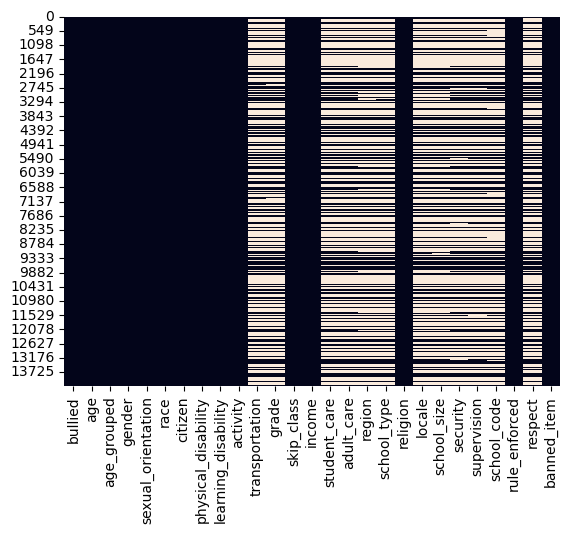

In [115]:
sns.heatmap(df_ml.isnull(), cbar=False)
plt.show()

In [116]:
df_dropna = df_ml.copy()
df_dropna.dropna(inplace=True)
df_dropna

,bullied,age,age_grouped,gender,sexual_orientation,race,citizen,physical_disability,learning_disability,activity,...,school_type,religion,locale,school_size,security,supervision,school_code,rule_enforced,respect,banned_item
0,0,15,2,1.0,1,2,1,0,1,0,...,1.0,0,2.0,4.0,1.0,1.0,1.0,1,1.0,0
2,0,12,1,1.0,1,2,1,0,0,0,...,1.0,0,2.0,2.0,1.0,1.0,1.0,1,1.0,0
3,0,12,1,1.0,1,2,1,0,0,1,...,1.0,0,2.0,3.0,1.0,1.0,1.0,1,1.0,0
8,1,16,2,0.0,3,3,1,0,0,1,...,1.0,0,2.0,3.0,1.0,1.0,1.0,1,1.0,0
13,0,12,1,0.0,1,2,1,0,0,0,...,1.0,0,4.0,3.0,1.0,1.0,1.0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14247,1,12,1,0.0,1,2,1,0,0,1,...,1.0,0,4.0,3.0,1.0,0.0,1.0,1,1.0,0
14256,1,13,1,0.0,1,4,1,0,0,0,...,1.0,0,1.0,3.0,1.0,1.0,1.0,1,1.0,1
14267,1,12,1,1.0,1,3,1,0,0,0,...,1.0,0,1.0,2.0,1.0,1.0,1.0,1,1.0,0
14271,0,16,2,0.0,1,4,1,0,0,0,...,2.0,1,1.0,2.0,1.0,0.0,1.0,1,1.0,0


In [117]:
df_ml.dropna(subset=['gender'], inplace=True)
df_ml['gender'] = df_ml['gender']
df_ml.isnull().sum()

bullied                   0
age                       0
age_grouped               0
gender                    0
sexual_orientation        0
race                      0
citizen                   0
physical_disability       0
learning_disability       0
activity                  0
transportation         8226
grade                  8315
skip_class                0
income                    0
student_care           8246
adult_care             8248
region                 8424
school_type            8375
religion                  0
locale                 8436
school_size            8453
security               8305
supervision            8300
school_code            8363
rule_enforced             0
respect                8250
banned_item               0
dtype: int64

In [118]:
df_ml.shape

(14267, 27)

In [123]:
df_ml.dropna(inplace=True)
df_ml.shape

(5469, 27)

In [124]:
df_ml.dtypes

bullied                  int64
age                      int64
age_grouped              int64
gender                 float64
sexual_orientation       int64
race                     int64
citizen                  int64
physical_disability      int64
learning_disability      int64
activity                 int64
transportation         float64
grade                  float64
skip_class               int64
income                   int64
student_care           float64
adult_care             float64
region                 float64
school_type            float64
religion                 int64
locale                 float64
school_size            float64
security               float64
supervision            float64
school_code            float64
rule_enforced            int64
respect                float64
banned_item              int64
dtype: object

In [125]:
df_ml.columns

Index(['bullied', 'age', 'age_grouped', 'gender', 'sexual_orientation', 'race',
       'citizen', 'physical_disability', 'learning_disability', 'activity',
       'transportation', 'grade', 'skip_class', 'income', 'student_care',
       'adult_care', 'region', 'school_type', 'religion', 'locale',
       'school_size', 'security', 'supervision', 'school_code',
       'rule_enforced', 'respect', 'banned_item'],
      dtype='object')

In [126]:
df_ml.to_csv('/Users/charlottewang/Desktop/code/df_ml.csv', index=0)